In [1]:
 import tensorflow as tf 
# Load the MNIST dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
# Normalize pixel values to [0, 1] 
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 
# Add a channel dimension to the images 
x_train = x_train[..., tf.newaxis] 
x_test = x_test[..., tf.newaxis] 
# Set up the Layers of the network 
model = tf.keras.models. Sequential ([ 
tf.keras.layers. Conv2D (32, (3, 3), activation= 'relu', input_shape=(28, 28, 1)), 
tf.keras.layers. MaxPooling2D((2, 2)), 
tf.keras.layers. Conv2D (64, (3, 3), activation= 'relu'), 
tf.keras.layers. MaxPooling2D((2, 2)), 
tf.keras.layers. Flatten(), 
tf.keras.layers. Dense (10, activation='softmax') 
])
# Compile the model 
model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']) 
# Train the model on the MNIST dataset 
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test)) 
#Evaluate the model on the MNIST test data 
test_loss, test_acc = model.evaluate(x_test, y_test) 
print('Test accuracy:', test_acc) 

2025-05-01 12:47:45.901885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746083865.928238    7280 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746083865.935905    7280 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746083865.955209    7280 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746083865.955238    7280 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746083865.955242    7280 computation_placer.cc:177] computation placer alr

Epoch 1/3


2025-05-01 12:47:57.743428: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8940 - loss: 0.3512

2025-05-01 12:48:40.651725: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8940 - loss: 0.3510 - val_accuracy: 0.9826 - val_loss: 0.0542
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.9858 - val_loss: 0.0403
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9888 - loss: 0.0377 - val_accuracy: 0.9881 - val_loss: 0.0400
 14/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9926 - loss: 0.0188

2025-05-01 12:50:02.024799: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0471
Test accuracy: 0.988099992275238


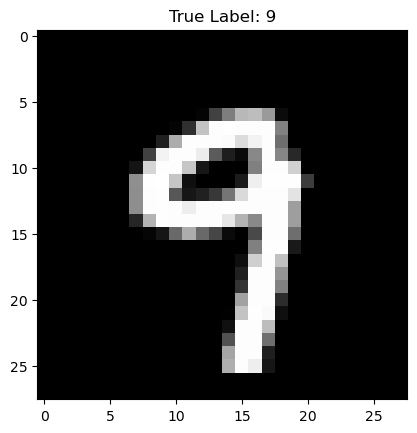

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Label: 9


In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# Predict a random sample
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.show()
prediction = np.argmax(model.predict(x_test[index].reshape(1, 28, 28, 1)))
print("Predicted Label:", prediction)